Mapper
======

### In this tutorial we will use the [kmapper](https://github.com/scikit-tda/kepler-mapper/tree/master/kmapper) python package to implement mapper clustering on some example data.

### Much of this tutorial is from the [KeplerMapper Documentation](https://kepler-mapper.scikit-tda.org/started.html) with minor edits. 


In [1]:
## First load in julia and python packages.

using DataFrames
using PyCall
using Plots
theme(:dark)

skdatasets = pyimport("sklearn.datasets")

println("Finished loading packages.")

┌ Info: Precompiling DataFrames [a93c6f00-e57d-5684-b7b6-d8193f3e46c0]
└ @ Base loading.jl:1242
┌ Info: Precompiling PyCall [438e738f-606a-5dbb-bf0a-cddfbfd45ab0]
└ @ Base loading.jl:1242
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1242


Finished loading packages.


#### Generate two concentric circles and see if Mapper can distinguish between them.

First we generate the circles data from the scikit-learn package with `make_circles`. This funciton produces an $nPoints \times nCoordinates$ array describing points randomly sampled from the two circles (plus noise). Before running mapper, let's plot the points and see how the data looks.

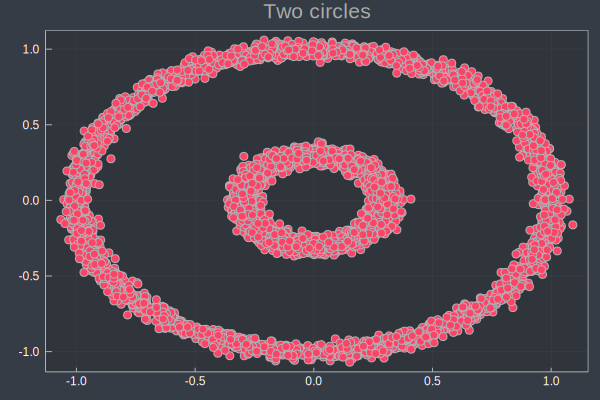

In [2]:
# Generate data
data, labels = skdatasets.make_circles(n_samples = 5000, noise = 0.03, factor = 0.3)

# Plot data
gr()
p1 = scatter(data[:,1],data[:,2], frame_style = :box, legend = false)
title!("Two circles")

Next we'll run mapper on the above data points. To demonstrate, we'll use the projection onto the first and second axes.

In [3]:
# Run mapper using reagular python via py""" """

py"""

import kmapper as km
import sklearn as sk


mapper = km.KeplerMapper(verbose=1)

# Next we project the data using the 'projection' variable. Currently it is set to [0,1], meaning we will use 
# as a lens using both coordinates of our points. Alternatively, the projection could be "sum", 
# "mean", sklearn.decomposition.PCA(), manifold.TSNE(), etc.
projected_data = mapper.fit_transform($data, projection=[0,1],scaler = None) 


# Create the mapper graph!
# The default cluster method is DBSCAN, or we could alternatively use 
# clusterer = sklearn.cluster.KMeans(2), etc.
graph = mapper.map(projected_data, $data, cover = km.Cover(n_cubes=10))


# Create visualization of the output and save.
output_path = "Two_circles_mapper.html"
mapper.visualize(graph, path_html = output_path,
                 title="make_circles(n_samples=5000, noise=0.03, factor=0.3)",color_function = $(data[:,1]))
"""

println("Finished making mapper graph!")


Finished making mapper graph!
